# Excavator use-case 4: MakeSpan optimization

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 25 elapsed time:0.008s
	Checking better value < 25
	Found value: 24 elapsed time:0.010s
	Checking better value < 24
	Found value: 23 elapsed time:0.011s
	Checking better value < 23
	Found value: 22 elapsed time:0.011s
	Checking better value < 22
	Found value: 21 elapsed time:0.011s
	Checking better value < 21
	Found value: 20 elapsed time:0.012s
	Checking better value < 20
	Found value: 19 elapsed time:0.012s
	Checking better value < 19
	Found value: 18 elapsed time:0.012s
	Checking better value < 18
	Found value: 17 elapsed time:0.012s
	Checking better value < 17
	Found value: 16 elapsed time:0.013s
	Checking better value < 16
	Found value: 15 elapsed time:0.013s
	Checking better value < 15
	Can't find a better solution for problem Excavator4:MakeSpan.

	Found optimum 15. Stopping iteration.
	total number of iterations: 12
	value: 15
	Excavator4:MakeSpan satisfiability checked in 0.01s


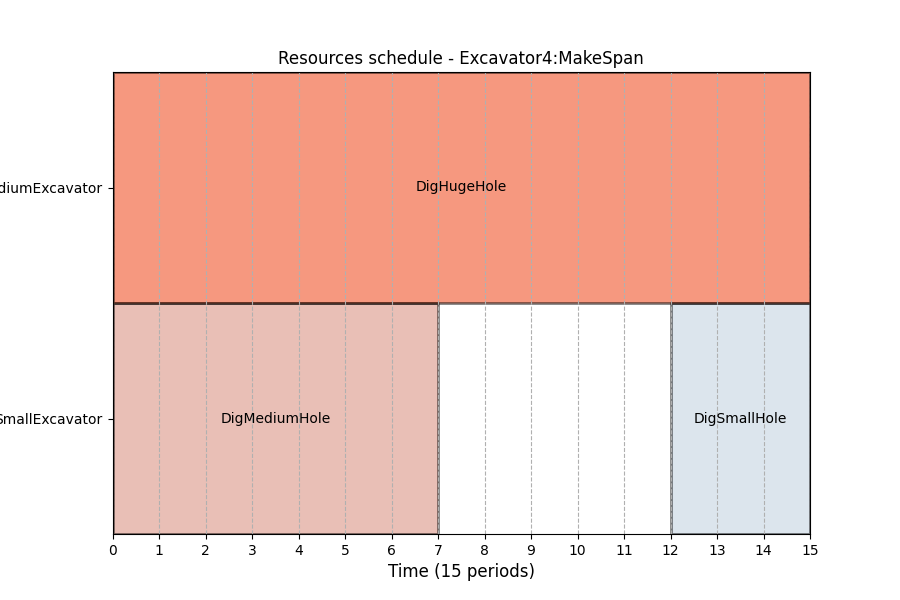

In [1]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem(name="Excavator4:MakeSpan")

# three tasks
dig_small_hole = ps.FixedDurationTask(name="DigSmallHole", duration=3)
dig_medium_hole = ps.FixedDurationTask(name="DigMediumHole", duration=7)
dig_huge_hole = ps.FixedDurationTask(name="DigHugeHole", duration=15)

# two workers
small_exc = ps.Worker(name="SmallExcavator")
medium_ex = ps.Worker(name="MediumExcavator")

dig_small_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
ps.ObjectiveMinimizeMakespan()

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)